In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(10, 8)
sns.set()



In [91]:
files = ['fileViews',
         'premium_cancellations',
         'premium_payments',
         'questions',
         'sessions',
         'students',
         'subjects'
         ]

datasets = {}
for file in files:
    datasets[file] = pd.read_csv(f"../data/processed/{file}.csv")#,parse_dates=[1,2],index_col=[0])
    print(f'*********{file}***********')
    print(datasets[file].shape)
    print(datasets[file].head())
    print("____________\n\n")

/home/ahgora/projetos/pd/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*********fileViews***********
(3028988, 4)
  StudentId                                           FileName  \
0  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
1  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
2  12970655                                          CALCULO I   
3  12970655                                          CALCULO I   
4  12970655                                          CALCULO I   

                     ViewDate Studentclient  
0  2017-02-23 10:46:03.047000       Website  
1  2017-02-23 10:46:12.370000       Website  
2  2017-05-25 22:39:48.000000       Website  
3  2017-05-25 22:40:36.000000       Website  
4  2017-05-25 22:43:16.000000       Website  
____________


*********premium_cancellations***********
(844, 2)
   StudentId            CancellationDate
0   34129668  2016-05-05 19:08:31.937000
1   34129668  2016-05-05 22:48:20.830000
2   82394932  2016-05-20 22:37:21.117000
3   82942835  2016-05-31 13:44:55.307000
4   85382416 

---
## Explorando a base de usuários

In [92]:
students = datasets['students']
students.shape

(60000, 8)

In [93]:
students.head(2)

,Id,RegisteredDate,UniversityName,CourseName,State,SignupSource,City,StudentClient
0,12970655,2012-05-29 15:22:27.490000,PUC-RIO,Administração,Rio de Janeiro,Email,NaN,NaN
1,59873654,2012-09-03 20:32:04.853000,UFF,Direito do Trabalho e Segurança Social,Rio de Janeiro,Facebook,Rio de Janeiro,NaN


Index(['ESTÁCIO', 'UNIP', 'UNOPAR', 'UNINTER', 'ESTÁCIO EAD',
       'UNIDERP - ANHANGUERA', 'Anhanguera', 'USP-SP', 'PITÁGORAS', 'UFRJ'],
      dtype='object')

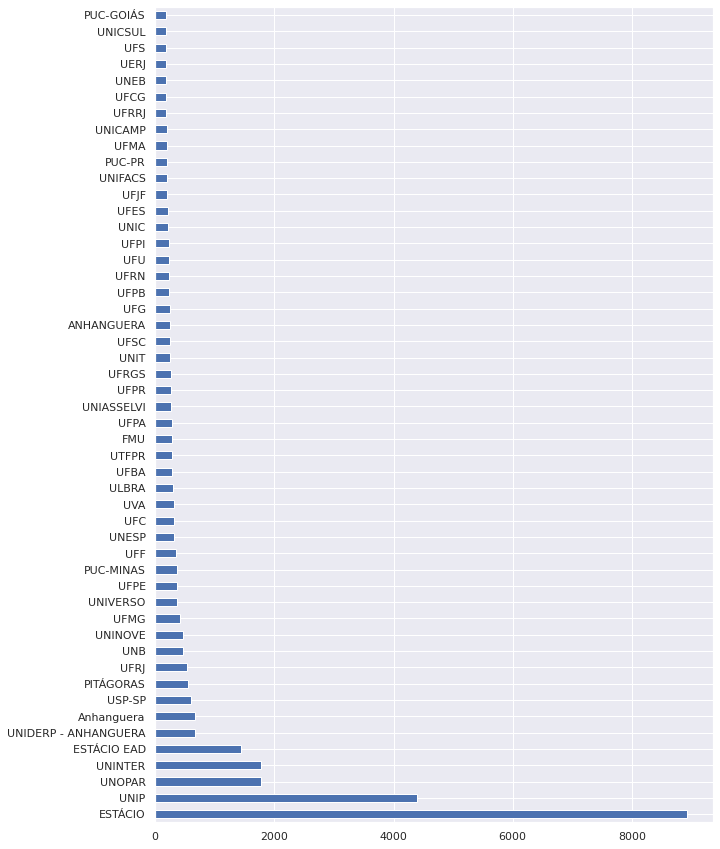

In [94]:
figsize(10, 15)
students.UniversityName.value_counts().nlargest(50).plot.barh()
top_10 = students.UniversityName.value_counts().nlargest(10).index
top_10

In [95]:
students.State.describe()

count              24239
unique                27
top       Rio de Janeiro
freq                5201
Name: State, dtype: object

In [96]:
students.State.fillna("NA").value_counts()

NA                     35761
Rio de Janeiro          5201
São Paulo               3873
Minas Gerais            2363
Paraná                  1395
Bahia                   1314
Ceara                   1194
Rio Grande do Sul       1110
Pernambuco               896
Santa Catarina           853
Goias                    728
Pará                     561
Espirito Santo           560
Maranhão                 485
Sergipe                  445
Mato Grosso do Sul       438
Rio Grande do Norte      367
Amazonas                 357
Paraíba                  352
Distrito Federal         348
Alagoas                  313
Mato Grosso              294
Piauí                    270
Tocantins                156
Amapa                    148
Rondonia                 118
Acre                      50
Roraima                   50
Name: State, dtype: int64

In [97]:
students.loc[students.State.isna()]

,Id,RegisteredDate,UniversityName,CourseName,State,SignupSource,City,StudentClient
4,36988693,2012-10-15 21:34:51.143000,UFU,Engenharia Elétrica,NaN,Facebook,NaN,NaN
8,9448057,2012-12-03 19:55:03.750000,UFSCAR,Biotecnologia,NaN,Facebook,NaN,NaN
10,90436208,2012-12-03 19:54:25.703000,UTFPR,Engenharia Civil e Ambiental,NaN,Facebook,NaN,NaN
18,17591347,2012-11-13 19:55:27.797000,UNESP,Engenharia Elétrica,NaN,Facebook,NaN,NaN
23,78654666,2012-09-26 02:29:32.973000,UFMS,Medicina,NaN,Facebook,NaN,NaN
...,...,...,...,...,...,...,...,...
59995,54115498,2017-11-30 23:47:51.722922,UNIP,Matemática,NaN,Facebook,NaN,Android | 6.0.1 | sdk 23
59996,38908858,2017-11-30 21:48:58.905591,IFNMG,Biologia / Ciências Biológicas,NaN,Google,NaN,Website
59997,85504547,2017-11-30 21:50:35.999806,FIAR,Educação Física,NaN,Google,NaN,Android | 5.0.2 | sdk 21
59998,27219342,2017-11-30 21:53:45.939686,UBC,Arquitetura e Urbanismo,NaN,Google,NaN,Webapp


In [98]:
students.CourseName.value_counts().nlargest(20)

Direito                               9862
Administração                         4099
Engenharia Civil                      3585
Contabilidade / Ciências Contábeis    2744
Pedagogia                             2627
Psicologia                            2155
Enfermagem                            2054
Medicina                              1656
Fisioterapia                          1464
Engenharia Mecânica                   1451
Nutrição                              1297
Farmácia / Ciências Farmacêuticas     1142
Educação Física                       1076
Engenharia de Produção                1053
Odontologia                            985
Engenharia Elétrica                    957
Veterinária / Medicina Veterinária     890
Biologia / Ciências Biológicas         753
Arquitetura e Urbanismo                724
Gestão de Recursos Humanos             645
Name: CourseName, dtype: int64

In [99]:
students.UniversityName.value_counts().nsmallest(100)

FATEBE      1
FGN         1
FNSL        1
FEC-FAAP    1
ITEP        1
           ..
FECEA       1
IETEC       1
UNICE       1
ESP         1
SEC         1
Name: UniversityName, Length: 100, dtype: int64

In [100]:
top_10_university_students = students.loc[students.UniversityName.isin(top_10)]
top_10_university_students.CourseName.value_counts().nlargest(20)

Direito                                  3103
Administração                            2374
Pedagogia                                1788
Contabilidade / Ciências Contábeis       1626
Engenharia Civil                         1103
Psicologia                                883
Enfermagem                                864
Educação Física                           554
Fisioterapia                              519
Nutrição                                  476
Gestão de Recursos Humanos                472
Engenharia Mecânica                       454
Análise e Desenvolvimento de Sistemas     366
Serviço Social                            354
Engenharia de Produção                    345
Farmácia / Ciências Farmacêuticas         273
Engenharia Elétrica                       245
Arquitetura e Urbanismo                   233
Medicina                                  187
Logística                                 186
Name: CourseName, dtype: int64

<AxesSubplot:>

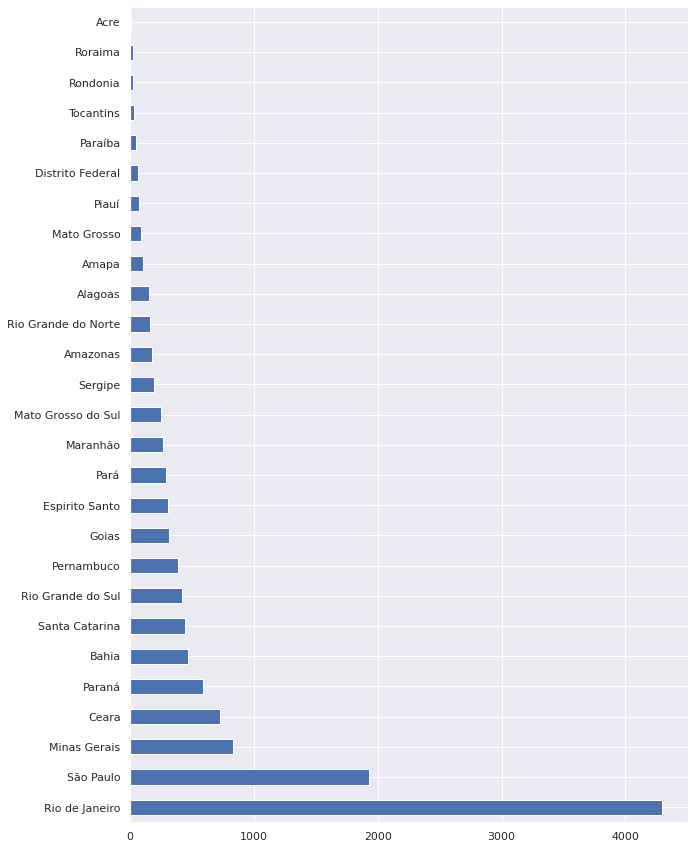

In [101]:
top_10_university_students.State.value_counts().nlargest(10)
top_10_university_students.State.value_counts().plot.barh()

In [102]:
other_universities = ( students.UniversityName.isin(top_10))==False
direito = students.CourseName == 'Direito'

In [103]:
direito_top_cities = students.loc[( students.UniversityName.isin(top_10)) & direito ].State.value_counts()
direito_top_cities
direito_top_cities.nlargest(5).index


Index(['Rio de Janeiro', 'São Paulo', 'Ceara', 'Minas Gerais', 'Pernambuco'], dtype='object')

In [104]:
on_states = ( students.State.isin(direito_top_cities.nlargest(5).index))
other_universities_states = students.loc[other_universities & direito & on_states]
other_universities_states.UniversityName.value_counts().nlargest(10)

MACKENZIE    55
PUC-MINAS    39
FMU          27
UCAM         27
UNINOVE      19
PUC-SP       18
UNICAP       17
UNIVERSO     15
UERJ         13
UNIFOR       13
Name: UniversityName, dtype: int64

Explorando Sessions

In [105]:
sessions = datasets['sessions']
sessions.head(3)

,StudentId,SessionStartTime,StudentClient
0,12970655,2017-02-20 14:51:37,Website
1,12970655,2017-02-22 14:04:34,Website
2,12970655,2017-02-23 13:46:14,Website


In [106]:
sessions.StudentId.value_counts()

8634223     2543
9187725     1766
97540741    1031
56029708     923
62447266     911
            ... 
22691835       1
6650455        1
65801934       1
71864397       1
65199255       1
Name: StudentId, Length: 60000, dtype: int64

In [107]:
sessions.SessionStartTime.max()

'2018-06-08 05:01:51'

In [108]:
sessions.groupby(['StudentId']).count().reset_index()

,StudentId,SessionStartTime,StudentClient
0,2774,2,2
1,3287,2,2
2,3546,41,41
3,7251,9,9
4,7338,26,26
...,...,...,...
59995,99985766,41,41
59996,99987011,3,3
59997,99990926,5,5
59998,99995568,79,79


In [109]:
sessions['week_year'] = pd.to_datetime(sessions.SessionStartTime).map(lambda x:  x.strftime("%Y-%V") )
session_agg = sessions.groupby([ 'week_year','StudentId']).agg({ 'week_year':['count'] }).reset_index()
session_agg.head(5)

,week_year,StudentId,week_year
,,,count
0,2017-06,3546,1
1,2017-06,57116,1
2,2017-06,68592,1
3,2017-06,82116,1
4,2017-06,186567,3


In [110]:
session_agg.loc[session_agg.StudentId == 186567]

,week_year,StudentId,week_year
,,,count
4,2017-06,186567,3
1193,2017-07,186567,1
39347,2017-16,186567,4
45488,2017-17,186567,3
51655,2017-18,186567,6
162849,2017-35,186567,1
171941,2017-36,186567,4
191656,2017-38,186567,1
204326,2017-39,186567,1


In [111]:
session_agg.loc[session_agg.StudentId == 186567].week_year.agg(['count','mean'])['count'].values

array([28.        ,  2.53571429])

In [112]:
hard_users = sessions.StudentId.value_counts().nlargest(100).index
df_hard_users = students.loc[students.Id.isin(hard_users)]
df_hard_users.State.value_counts()

Rio de Janeiro         16
São Paulo               8
Minas Gerais            7
Maranhão                5
Pernambuco              5
Bahia                   4
Rio Grande do Sul       4
Santa Catarina          3
Paraná                  3
Ceara                   3
Pará                    2
Mato Grosso             1
Amapa                   1
Mato Grosso do Sul      1
Tocantins               1
Espirito Santo          1
Acre                    1
Alagoas                 1
Rio Grande do Norte     1
Goias                   1
Name: State, dtype: int64

In [113]:
payments = datasets['premium_payments']
payments.loc[payments.StudentId.isin(hard_users)].StudentId.value_counts()

4048029     14
1231617     14
47377640    11
57187584    10
97540741    10
90291210     8
16243450     8
41517872     7
47909440     7
53376413     7
23210941     6
18922795     6
9187725      4
67137921     4
54223446     3
77771136     3
63831634     3
17846067     2
59876188     2
28031781     2
22321964     2
16143842     2
83943458     1
38708690     1
62038073     1
96114712     1
62447266     1
66896685     1
41050425     1
40070134     1
89787486     1
1953637      1
56109164     1
72481573     1
48638129     1
75731013     1
Name: StudentId, dtype: int64

In [114]:
oldest_users = payments.loc[payments.StudentId.isin(hard_users)].StudentId.value_counts().nlargest(10).index
oldest_users
df_oldest_users = students.loc[students.Id.isin(oldest_users)]
df_oldest_users

,Id,RegisteredDate,UniversityName,CourseName,State,SignupSource,City,StudentClient
2843,16243450,2013-12-12 08:47:30.463000,UFSC,Engenharia Elétrica,Santa Catarina,Facebook,Lages,NaN
6323,53376413,2014-06-30 13:28:34.000000,UNIME,Odontologia,Pernambuco,Facebook,Petrolina,Website
11232,97540741,2015-03-26 02:30:24.247000,UNIFEI,Engenharia Aeronáutica,NaN,Email,NaN,Website
12217,57187584,2015-04-26 18:34:14.773000,UFVJM,Ciências Exatas e Tecnológicas,Minas Gerais,Facebook,NaN,Website
21391,47909440,2016-04-21 16:19:12.150000,IFSEMG,Engenharia Metalúrgica,Minas Gerais,Facebook,Juiz de Fora,NaN
21653,90291210,2016-04-27 10:31:43.223000,ESTÁCIO,Educação Física,São Paulo,Email,NaN,Website
28954,47377640,2017-01-11 14:20:48.567000,IFPA,Licenciatura em Física,NaN,Google,NaN,Website
32267,41517872,2017-04-08 14:45:01.099632,ESTÁCIO,Direito,Maranhão,Facebook,NaN,NaN
32425,1231617,2017-04-10 19:26:02.952000,USP-SC,Engenharia Elétrica,São Paulo,Google,NaN,NaN
33685,4048029,2017-04-28 18:24:11.563741,PUC-RS,Direito,NaN,Google,NaN,NaN


In [115]:
payments.loc[payments.StudentId.isin(hard_users)].PlanType.value_counts()

Mensal    132
Anual      17
Name: PlanType, dtype: int64

In [118]:
payments.groupby(['StudentId', "PlanType"]).count().reset_index()

,StudentId,PlanType,PaymentDate
0,43621,Mensal,3
1,51498,Mensal,1
2,105540,Anual,1
3,258634,Mensal,5
4,311572,Mensal,2
...,...,...,...
2006,99715024,Mensal,1
2007,99718924,Mensal,7
2008,99720133,Mensal,6
2009,99892099,Mensal,2


In [123]:
other_universities_states.UniversityName.value_counts().nlargest(10).index.values



array(['MACKENZIE', 'PUC-MINAS', 'FMU', 'UCAM', 'UNINOVE', 'PUC-SP',
       'UNICAP', 'UNIVERSO', 'UERJ', 'UNIFOR'], dtype=object)